# MLP
Cell line 14 IMR.90

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was a learn fail during CV.

MCC mean 

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 22:08:41.076074


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Mounted at /content/drive/
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=14]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


2023-04-29 22:08:59.518004
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 441
Num RCI: 441
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 441 sequences.

Training # 1 1
2023-04-29 22:09:03.142287
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-2.63411804077769, 0.5585074568195904]
Variances [3.47674223 1.46919005]
Priors [0.37957452 0.62042548]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 233:115 66.95%
Computed class weights: {0: 1.5130434782608695, 1: 0.7467811158798283}
Valid 1:0 54:39 58.06%
FIT


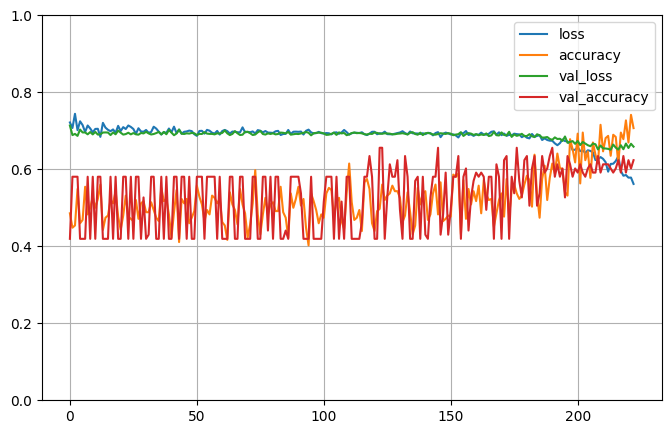


Testing # 1 1
2023-04-29 22:09:47.063457
PREDICT
Test 1:0 54:39 58.06%
Predict 1:0 76:17 81.72%
Test sizes (93, 1025) (93,)
Distrib of scores: 0.5010206 mean 0.0009701488 std
Range of scores: 0.49905035 to 0.5033838
Score threshold 0.5
Confusion matrix
 [[12 27]
 [ 5 49]]
Normalized matrix
 [[0.12903226 0.29032258]
 [0.05376344 0.52688172]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


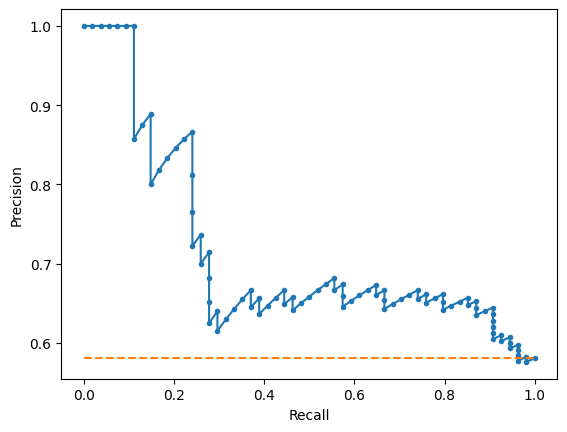

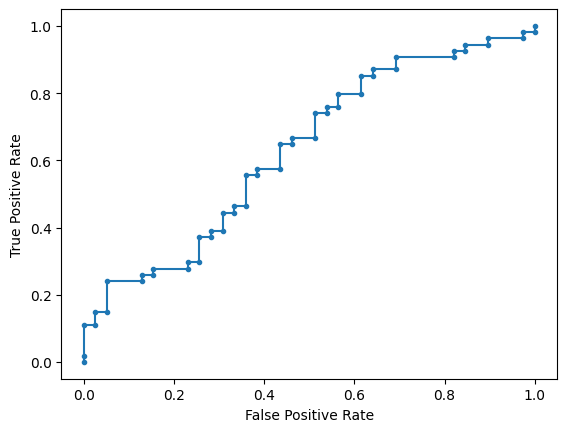

Accuracy: 65.59% Precision: 64.47% Recall: 90.74%
F1: 75.38% MCC: 0.2746
AUPRC: 71.40% AUROC: 63.15%
 accuracy [65.59139784946237]
 precision [64.47368421052632]
 recall [90.74074074074075]
 F1 [75.38461538461537]
 MCC [0.27462354043850756]
 AUPRC [71.39569533383904]
 AUROC [63.152896486229814]

Training # 1 2
2023-04-29 22:09:47.758576
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-2.717728242240844, 0.5243892143435377]
Variances [2.53589381 1.42739134]
Priors [0.38608743 0.61391257]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 227:123 64.86%
Computed class weights: {0: 1.4227642276422765, 1: 0.7709251101321586}
Valid 1:0 59:32 64.84%
FIT


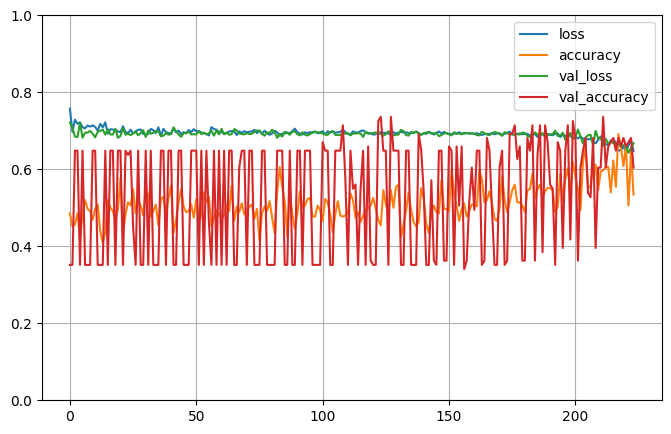


Testing # 1 2
2023-04-29 22:10:15.106661
PREDICT
Test 1:0 59:32 64.84%
Predict 1:0 75:16 82.42%
Test sizes (91, 1025) (91,)
Distrib of scores: 0.5008408 mean 0.00080215925 std
Range of scores: 0.49911058 to 0.50312454
Score threshold 0.5
Confusion matrix
 [[12 20]
 [ 4 55]]
Normalized matrix
 [[0.13186813 0.21978022]
 [0.04395604 0.6043956 ]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


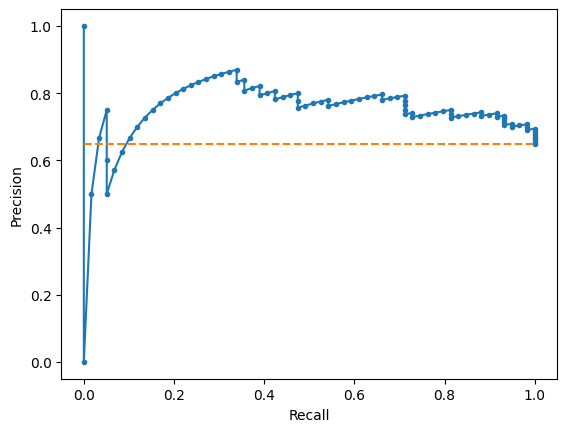

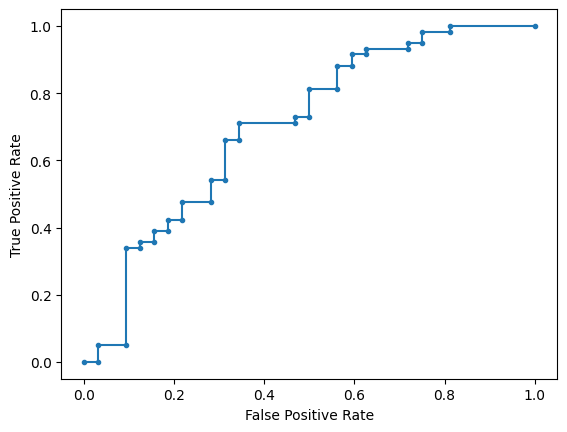

Accuracy: 73.63% Precision: 73.33% Recall: 93.22%
F1: 82.09% MCC: 0.3853
AUPRC: 74.96% AUROC: 70.23%
 accuracy [73.62637362637363]
 precision [73.33333333333333]
 recall [93.22033898305084]
 F1 [82.08955223880598]
 MCC [0.385333152503232]
 AUPRC [74.95685277321462]
 AUROC [70.23305084745763]

Training # 1 3
2023-04-29 22:10:15.728271
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [0.6316052011578442, -2.6208451918813767]
Variances [1.42984643 3.50975702]
Priors [0.58541008 0.41458992]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 222:139 61.50%
Computed class weights: {0: 1.2985611510791366, 1: 0.8130630630630631}
Valid 1:0 51:29 63.75%
FIT


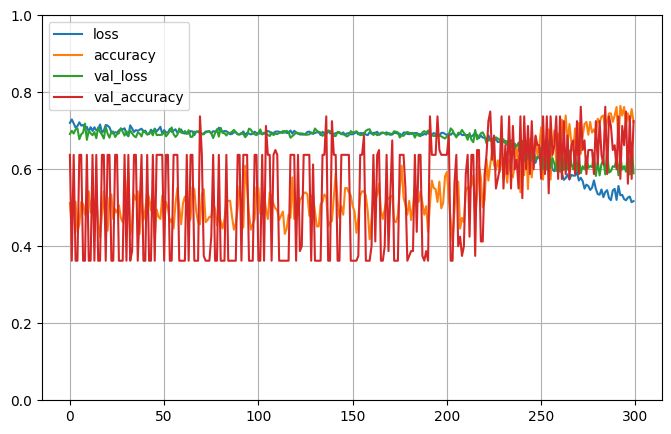


Testing # 1 3
2023-04-29 22:11:00.300977
PREDICT
Test 1:0 51:29 63.75%
Predict 1:0 59:21 73.75%
Test sizes (80, 1025) (80,)
Distrib of scores: 0.61029935 mean 0.190954 std
Range of scores: 0.18920486 to 0.9680373
Score threshold 0.5
Confusion matrix
 [[14 15]
 [ 7 44]]
Normalized matrix
 [[0.175  0.1875]
 [0.0875 0.55  ]]
Extreme scores correct, pos:neg 25 8
Extreme scores incorrect pos:neg 9 2


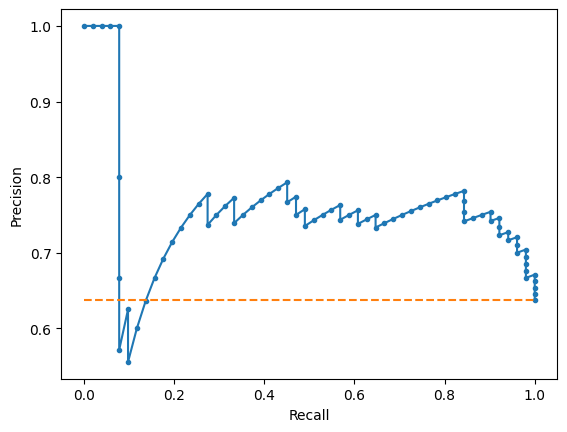

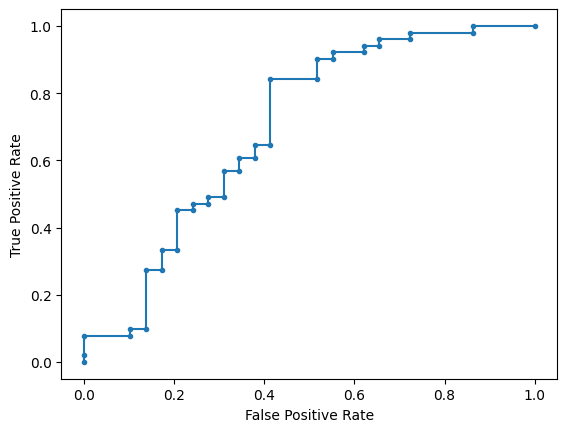

Accuracy: 72.50% Precision: 74.58% Recall: 86.27%
F1: 80.00% MCC: 0.3775
AUPRC: 75.69% AUROC: 69.78%
 accuracy [72.5]
 precision [74.57627118644068]
 recall [86.27450980392157]
 F1 [80.0]
 MCC [0.37748626994305773]
 AUPRC [75.69241591687619]
 AUROC [69.77687626774848]

Training # 1 4
2023-04-29 22:11:01.181677
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-2.8652184346349343, 0.409028012902644]
Variances [3.235395   1.51805034]
Priors [0.36104392 0.63895608]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 235:109 68.31%
Computed class weights: {0: 1.5779816513761469, 1: 0.7319148936170212}
Valid 1:0 67:30 69.07%
FIT


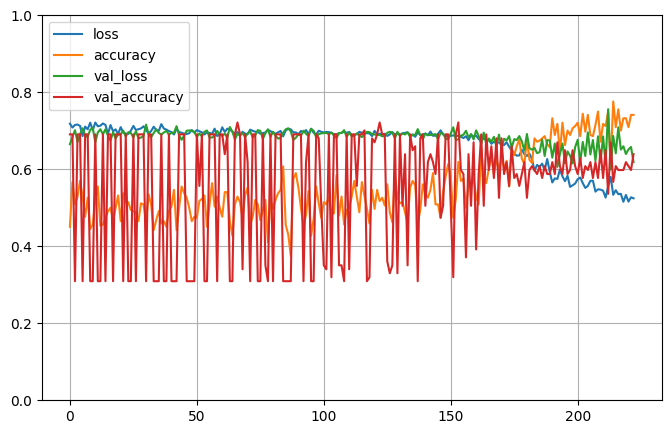


Testing # 1 4
2023-04-29 22:11:29.498313
PREDICT
Test 1:0 67:30 69.07%
Predict 1:0 92:5 94.85%
Test sizes (97, 1025) (97,)
Distrib of scores: 0.5035358 mean 0.002353229 std
Range of scores: 0.49946177 to 0.5103204
Score threshold 0.5
Confusion matrix
 [[ 4 26]
 [ 1 66]]
Normalized matrix
 [[0.04123711 0.26804124]
 [0.01030928 0.68041237]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


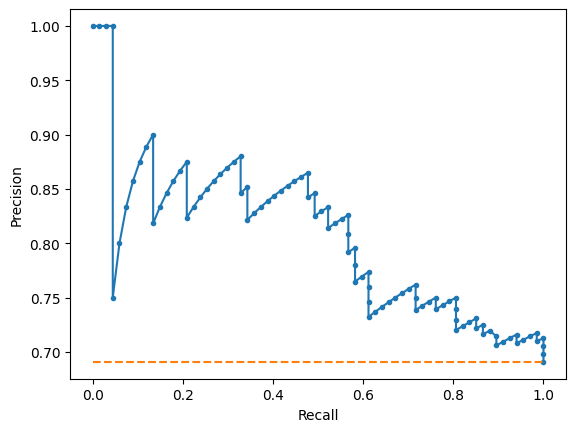

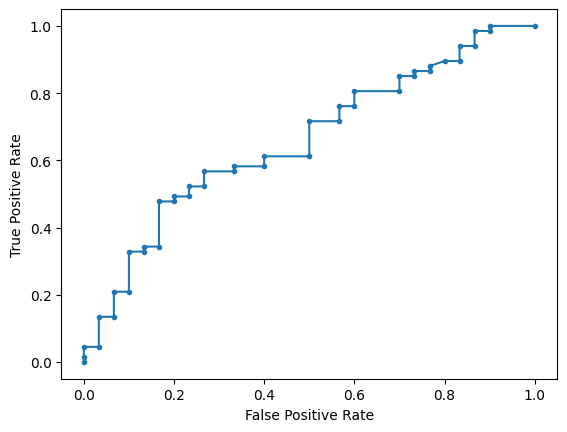

Accuracy: 72.16% Precision: 71.74% Recall: 98.51%
F1: 83.02% MCC: 0.2475
AUPRC: 80.51% AUROC: 65.75%
 accuracy [72.16494845360825]
 precision [71.73913043478261]
 recall [98.50746268656717]
 F1 [83.0188679245283]
 MCC [0.2475141389345842]
 AUPRC [80.50527111855523]
 AUROC [65.74626865671641]

Training # 1 5
2023-04-29 22:11:30.115715
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [0.6387406958166012, -2.487741611222976]
Variances [1.33100701 3.36592589]
Priors [0.56483234 0.43516766]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 214:147 59.28%
Computed class weights: {0: 1.227891156462585, 1: 0.8434579439252337}
Valid 1:0 53:27 66.25%
FIT


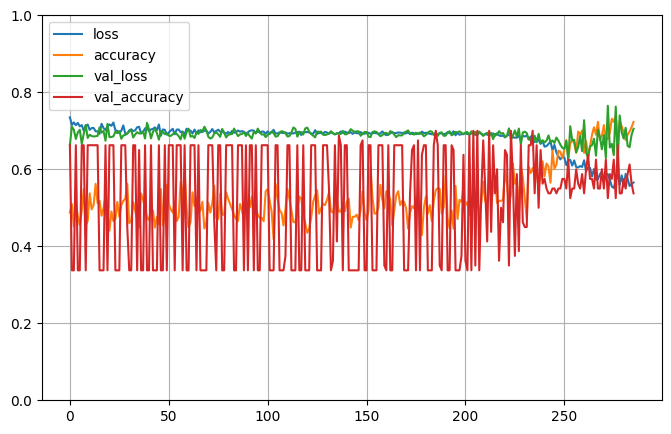


Testing # 1 5
2023-04-29 22:12:06.417778
PREDICT
Test 1:0 53:27 66.25%
Predict 1:0 77:3 96.25%
Test sizes (80, 1025) (80,)
Distrib of scores: 0.50229454 mean 0.0013248526 std
Range of scores: 0.49928895 to 0.5059785
Score threshold 0.5
Confusion matrix
 [[ 3 24]
 [ 0 53]]
Normalized matrix
 [[0.0375 0.3   ]
 [0.     0.6625]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


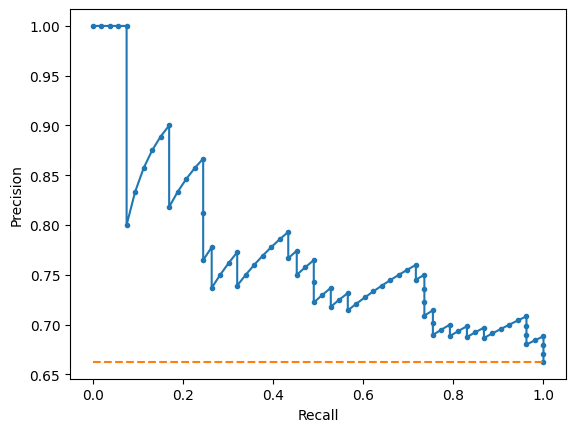

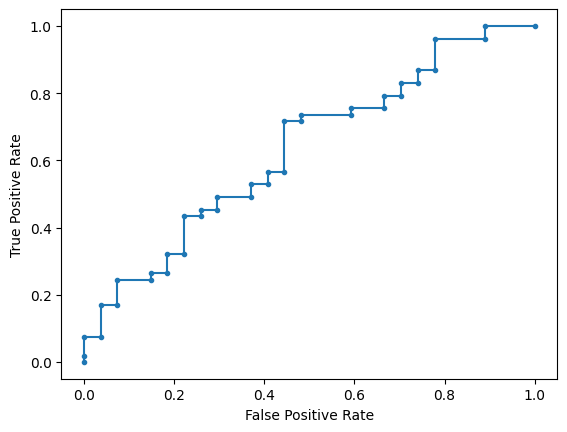

Accuracy: 70.00% Precision: 68.83% Recall: 100.00%
F1: 81.54% MCC: 0.2765
AUPRC: 77.19% AUROC: 63.31%
 accuracy [70.0]
 precision [68.83116883116884]
 recall [100.0]
 F1 [81.53846153846155]
 MCC [0.2765485065573063]
 AUPRC [77.18800371250725]
 AUROC [63.312368972746334]

Training # 2 1
2023-04-29 22:12:07.012805
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-2.5678109585575766, 0.5734610253045949]
Variances [3.27656158 1.40925418]
Priors [0.41724837 0.58275163]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 219:137 61.52%
Computed class weights: {0: 1.2992700729927007, 1: 0.8127853881278538}
Valid 1:0 55:30 64.71%
FIT


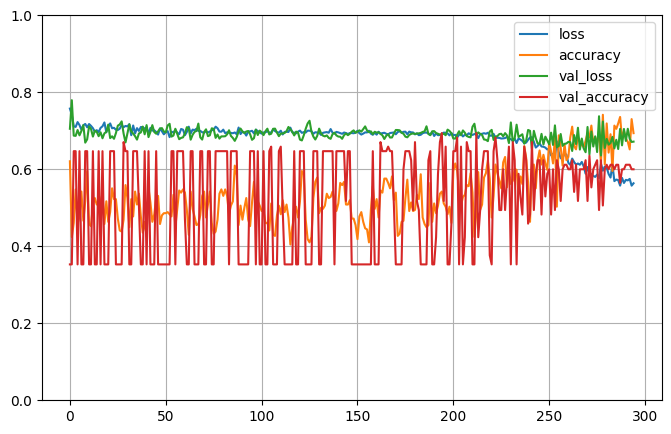


Testing # 2 1
2023-04-29 22:12:50.197462
PREDICT
Test 1:0 55:30 64.71%
Predict 1:0 63:22 74.12%
Test sizes (85, 1025) (85,)
Distrib of scores: 0.50235283 mean 0.0028174163 std
Range of scores: 0.49642065 to 0.5086101
Score threshold 0.5
Confusion matrix
 [[13 17]
 [ 9 46]]
Normalized matrix
 [[0.15294118 0.2       ]
 [0.10588235 0.54117647]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


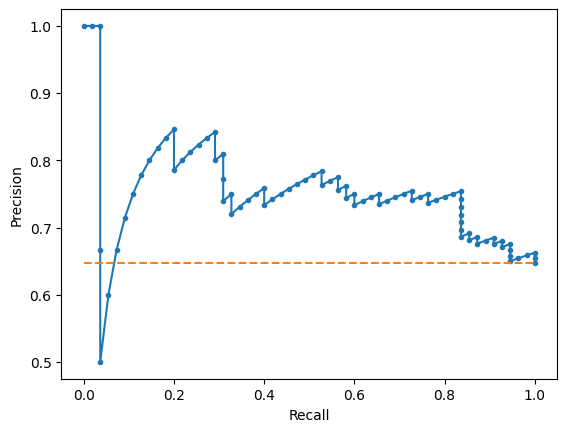

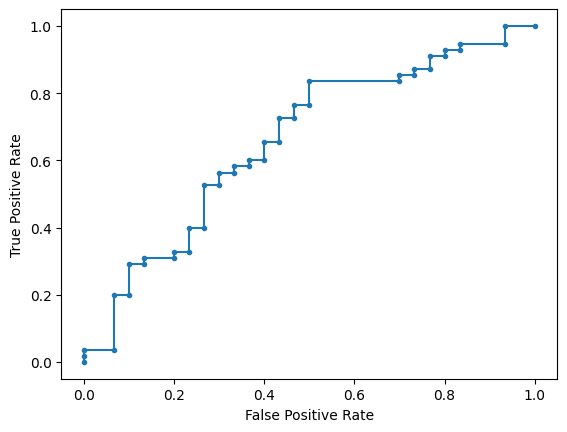

Accuracy: 69.41% Precision: 73.02% Recall: 83.64%
F1: 77.97% MCC: 0.2943
AUPRC: 75.14% AUROC: 65.82%
 accuracy [69.41176470588235]
 precision [73.01587301587301]
 recall [83.63636363636363]
 F1 [77.96610169491525]
 MCC [0.29426351865156547]
 AUPRC [75.13711678211912]
 AUROC [65.81818181818181]

Training # 2 2
2023-04-29 22:12:50.800885
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-2.5664409288812995, 0.5686141777802556]
Variances [3.04077848 1.47950125]
Priors [0.39237606 0.60762394]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 229:125 64.69%
Computed class weights: {0: 1.416, 1: 0.7729257641921398}
Valid 1:0 52:35 59.77%
FIT


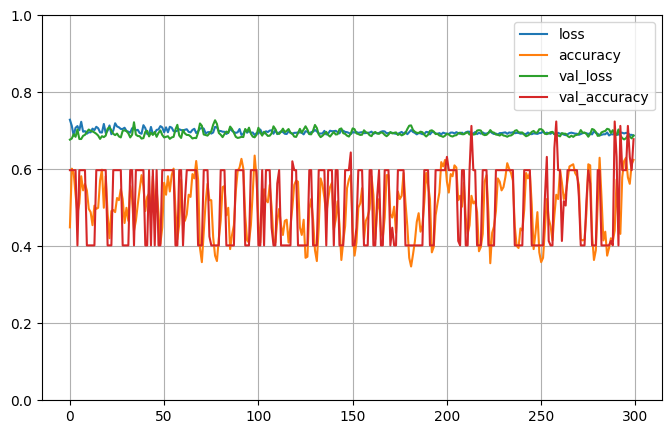


Testing # 2 2
2023-04-29 22:13:27.810412
PREDICT
Test 1:0 52:35 59.77%
Predict 1:0 42:45 48.28%
Test sizes (87, 1025) (87,)
Distrib of scores: 0.5004591 mean 0.0064384444 std
Range of scores: 0.4878519 to 0.5220926
Score threshold 0.5
Confusion matrix
 [[26  9]
 [19 33]]
Normalized matrix
 [[0.29885057 0.10344828]
 [0.2183908  0.37931034]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


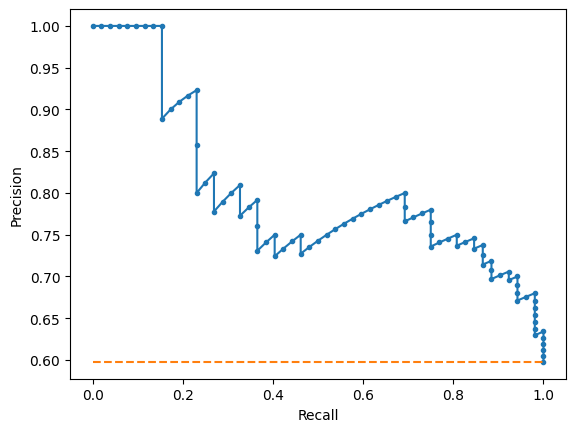

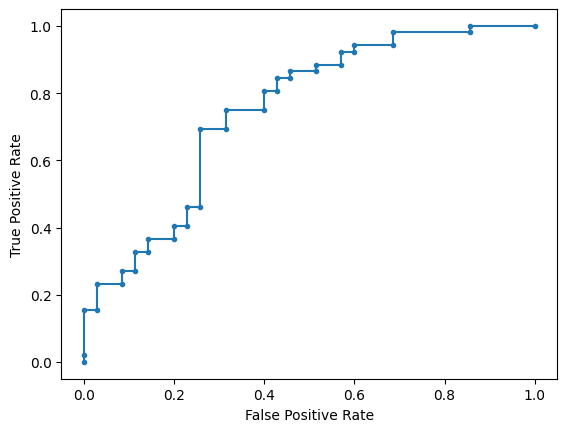

Accuracy: 67.82% Precision: 78.57% Recall: 63.46%
F1: 70.21% MCC: 0.3704
AUPRC: 80.14% AUROC: 74.95%
 accuracy [67.81609195402298]
 precision [78.57142857142857]
 recall [63.46153846153846]
 F1 [70.2127659574468]
 MCC [0.37041634402730345]
 AUPRC [80.13994490551019]
 AUROC [74.94505494505495]

Training # 2 3
2023-04-29 22:13:28.424045
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-2.69764608147578, 0.4800918686461775]
Variances [3.24368989 1.5414928 ]
Priors [0.39777531 0.60222469]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 229:130 63.79%
Computed class weights: {0: 1.3807692307692307, 1: 0.7838427947598253}
Valid 1:0 59:23 71.95%
FIT


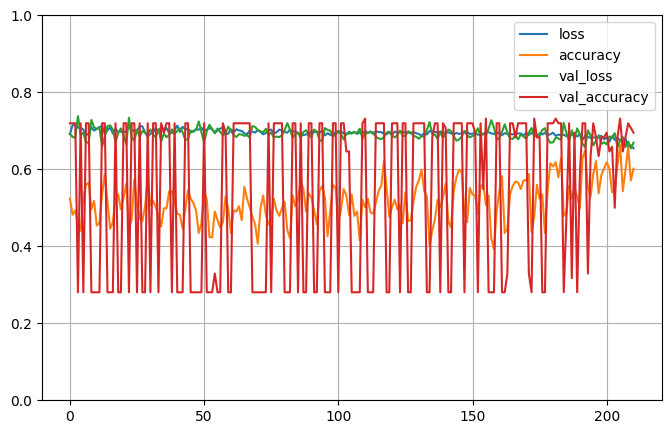


Testing # 2 3
2023-04-29 22:13:56.925855
PREDICT
Test 1:0 59:23 71.95%
Predict 1:0 53:29 64.63%
Test sizes (82, 1025) (82,)
Distrib of scores: 0.5001919 mean 0.00085187535 std
Range of scores: 0.49825367 to 0.50187045
Score threshold 0.5
Confusion matrix
 [[15  8]
 [14 45]]
Normalized matrix
 [[0.18292683 0.09756098]
 [0.17073171 0.54878049]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


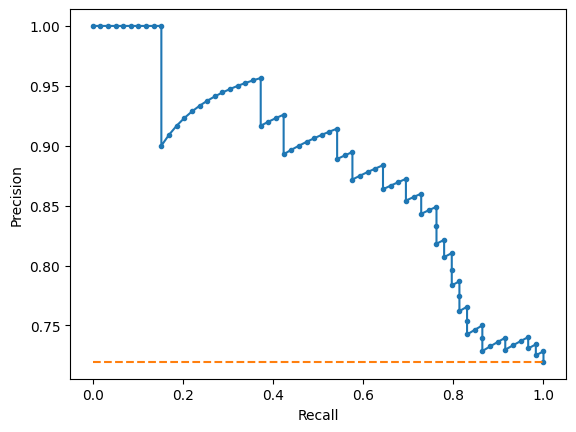

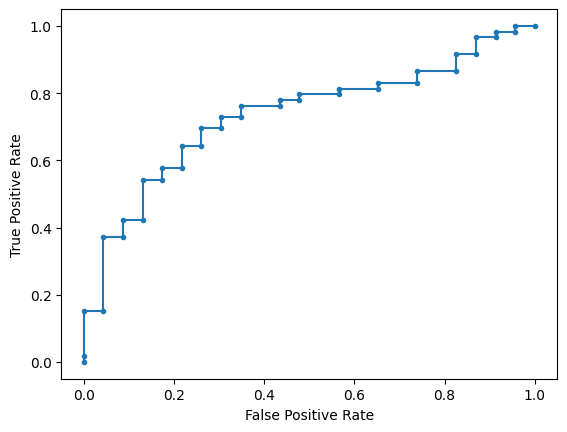

Accuracy: 73.17% Precision: 84.91% Recall: 76.27%
F1: 80.36% MCC: 0.3898
AUPRC: 88.31% AUROC: 73.54%
 accuracy [73.17073170731707]
 precision [84.90566037735849]
 recall [76.27118644067797]
 F1 [80.35714285714285]
 MCC [0.3898356365062558]
 AUPRC [88.31227320852642]
 AUROC [73.5445836403832]

Training # 2 4
2023-04-29 22:13:57.603069
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [0.5233140887746122, -2.7467204847898126]
Variances [1.4601074  3.41915731]
Priors [0.63305468 0.36694532]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 228:108 67.86%
Computed class weights: {0: 1.5555555555555556, 1: 0.7368421052631579}
Valid 1:0 63:42 60.00%
FIT


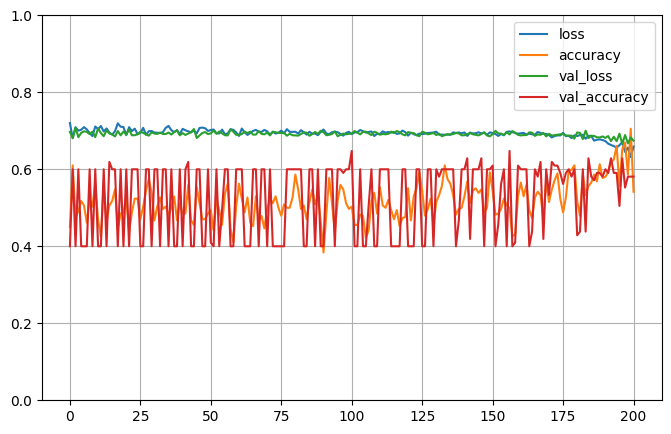


Testing # 2 4
2023-04-29 22:14:40.853953
PREDICT
Test 1:0 63:42 60.00%
Predict 1:0 98:7 93.33%
Test sizes (105, 1025) (105,)
Distrib of scores: 0.50098497 mean 0.0006858572 std
Range of scores: 0.49961486 to 0.5026003
Score threshold 0.5
Confusion matrix
 [[ 6 36]
 [ 1 62]]
Normalized matrix
 [[0.05714286 0.34285714]
 [0.00952381 0.59047619]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


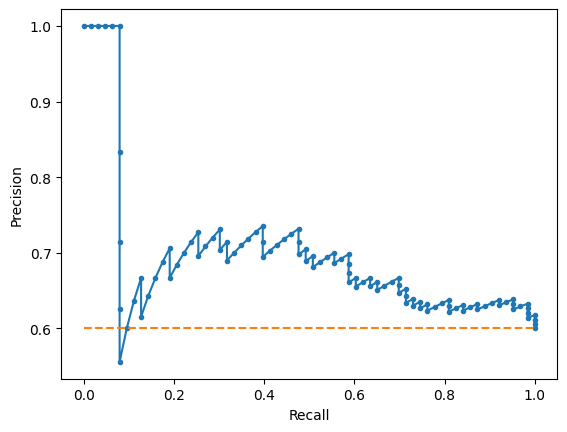

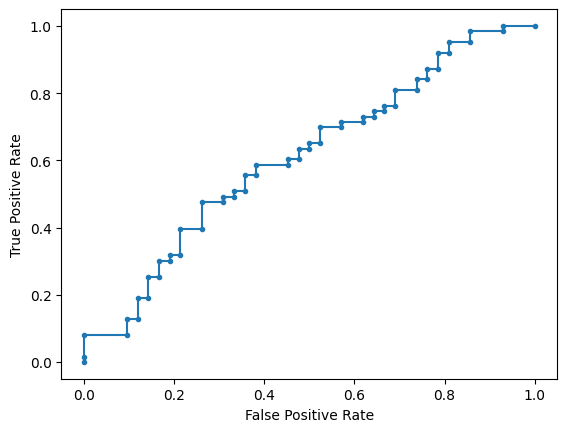

Accuracy: 64.76% Precision: 63.27% Recall: 98.41%
F1: 77.02% MCC: 0.2494
AUPRC: 69.43% AUROC: 61.04%
 accuracy [64.76190476190476]
 precision [63.26530612244898]
 recall [98.4126984126984]
 F1 [77.01863354037266]
 MCC [0.24939187455541986]
 AUPRC [69.43310637015814]
 AUROC [61.03552532123962]

Training # 2 5
2023-04-29 22:14:41.508294
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [0.6302053607250955, -2.658795181231708]
Variances [1.30186567 3.2985036 ]
Priors [0.5866404 0.4133596]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 219:140 61.00%
Computed class weights: {0: 1.2821428571428573, 1: 0.819634703196347}
Valid 1:0 51:31 62.20%
FIT


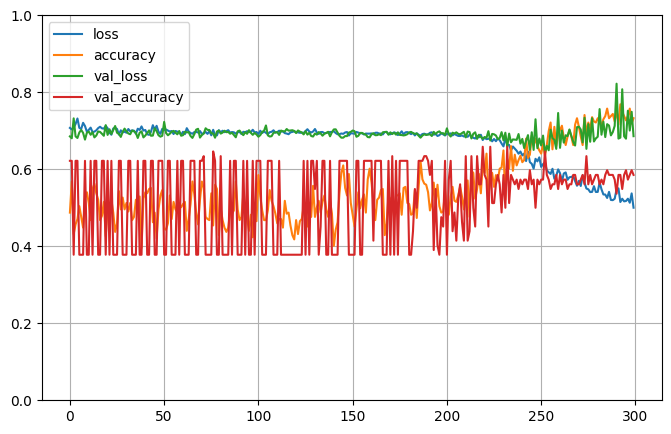


Testing # 2 5
2023-04-29 22:15:24.909830
PREDICT
Test 1:0 51:31 62.20%
Predict 1:0 41:41 50.00%
Test sizes (82, 1025) (82,)
Distrib of scores: 0.53482944 mean 0.23609686 std
Range of scores: 0.099342845 to 0.96211314
Score threshold 0.5
Confusion matrix
 [[19 12]
 [22 29]]
Normalized matrix
 [[0.23170732 0.14634146]
 [0.26829268 0.35365854]]
Extreme scores correct, pos:neg 21 9
Extreme scores incorrect pos:neg 7 10


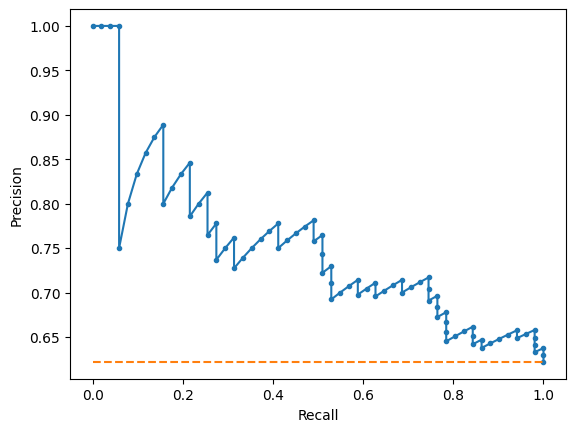

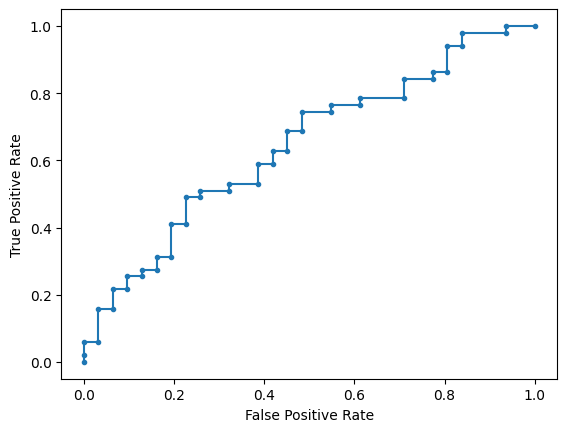

Accuracy: 58.54% Precision: 70.73% Recall: 56.86%
F1: 63.04% MCC: 0.1760
AUPRC: 74.74% AUROC: 64.39%
 accuracy [58.536585365853654]
 precision [70.73170731707317]
 recall [56.86274509803921]
 F1 [63.04347826086957]
 MCC [0.1760484091897499]
 AUPRC [74.7448146978529]
 AUROC [64.38962681846932]
2023-04-29 22:15:25.904186


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 68.76% std 4.74
 precision mean 72.34% std 6.35
 recall mean 84.74% std 14.99
 F1 mean 77.06% std 6.21
 MCC mean 0.3041 std 0.0731
 AUPRC mean 76.75% std 5.30
 AUROC mean 67.20% std 4.68
 accuracy [[65.59139784946237], [73.62637362637363], [72.5], [72.16494845360825], [70.0], [69.41176470588235], [67.81609195402298], [73.17073170731707], [64.76190476190476], [58.536585365853654]]
 precision [[64.47368421052632], [73.33333333333333], [74.57627118644068], [71.73913043478261], [68.83116883116884], [73.01587301587301], [78.57142857142857], [84.90566037735849], [63.26530612244898], [70.73170731707317]]
 recall [[90.74074074074075], [93.22033898305084], [86.27450980392157], [98.50746268656717], [100.0], [83.63636363636363], [63.46153846153846], [76.27118644067797], [98.4126984126984], [56.86274509803921]]
 F1 [[75.38461538461537], [82.08955223880598], [80.0], [83.0188679245283], [81.53846153846155], [77.96610169491525], [70.2127659574468], [80.35714285714285], [77.018633540372